In [2]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
train.head(10)

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417
5,5,25.0,0.50,0.25,0.63,0.75,94.6,57.2,79.0,68.2,33.0,55.9,34.0,0.56,0.565239,0.484350,40.555019,7267.28344
6,6,12.5,0.25,0.38,0.50,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.498730,0.442193,35.517539,5739.68029
7,7,12.5,0.25,0.25,0.75,0.75,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.619888,0.529502,42.191013,7920.06175
8,8,25.0,0.50,0.38,0.38,0.75,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.532557,0.465367,36.166044,6465.37205
9,9,25.0,0.50,0.25,0.63,0.63,94.6,57.2,79.0,68.2,33.0,55.9,34.0,0.56,0.340063,0.381768,28.763565,3519.43131


In [5]:
test.head(10)

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
0,15289,25.0,0.25,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.399367,0.408088,31.394569
1,15290,12.5,0.25,0.25,0.75,0.63,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.488048,0.442866,36.846956
2,15291,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.583379,0.487057,40.037644
3,15292,25.0,0.50,0.38,0.38,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.433014,0.422847,33.116091
4,15293,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.360996,0.388860,29.558019
5,15294,12.5,0.25,0.25,0.75,0.75,94.6,57.2,79.0,68.2,33.0,55.9,34.0,0.56,0.451911,0.435621,32.814561
6,15295,12.5,0.25,0.25,0.75,0.63,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.572611,0.482119,40.161668
7,15296,12.5,0.25,0.38,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,1.0,0.10,0.520637,0.433668,35.314005
8,15297,25.0,0.50,0.38,0.50,0.75,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.645641,0.520004,44.278583
9,15298,25.0,0.25,0.25,0.25,0.25,77.4,46.8,64.7,55.8,27.0,45.8,34.0,0.56,0.398218,0.408088,31.378241


## Data Info

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15289 entries, 0 to 15288
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    15289 non-null  int64  
 1   clonesize             15289 non-null  float64
 2   honeybee              15289 non-null  float64
 3   bumbles               15289 non-null  float64
 4   andrena               15289 non-null  float64
 5   osmia                 15289 non-null  float64
 6   MaxOfUpperTRange      15289 non-null  float64
 7   MinOfUpperTRange      15289 non-null  float64
 8   AverageOfUpperTRange  15289 non-null  float64
 9   MaxOfLowerTRange      15289 non-null  float64
 10  MinOfLowerTRange      15289 non-null  float64
 11  AverageOfLowerTRange  15289 non-null  float64
 12  RainingDays           15289 non-null  float64
 13  AverageRainingDays    15289 non-null  float64
 14  fruitset              15289 non-null  float64
 15  fruitmass          

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10194 entries, 0 to 10193
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10194 non-null  int64  
 1   clonesize             10194 non-null  float64
 2   honeybee              10194 non-null  float64
 3   bumbles               10194 non-null  float64
 4   andrena               10194 non-null  float64
 5   osmia                 10194 non-null  float64
 6   MaxOfUpperTRange      10194 non-null  float64
 7   MinOfUpperTRange      10194 non-null  float64
 8   AverageOfUpperTRange  10194 non-null  float64
 9   MaxOfLowerTRange      10194 non-null  float64
 10  MinOfLowerTRange      10194 non-null  float64
 11  AverageOfLowerTRange  10194 non-null  float64
 12  RainingDays           10194 non-null  float64
 13  AverageRainingDays    10194 non-null  float64
 14  fruitset              10194 non-null  float64
 15  fruitmass          

In [8]:
train.isnull().sum()

id                      0
clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
yield                   0
dtype: int64

In [9]:
test.isnull().sum()

id                      0
clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
dtype: int64

In [10]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,15289.0,7644.000000,4413.698468,0.000000,3822.000000,7644.000000,11466.000000,15288.000000
clonesize,15289.0,19.704690,6.595211,10.000000,12.500000,25.000000,25.000000,40.000000
honeybee,15289.0,0.389314,0.361643,0.000000,0.250000,0.500000,0.500000,18.430000
bumbles,15289.0,0.286768,0.059917,0.000000,0.250000,0.250000,0.380000,0.585000
andrena,15289.0,0.492675,0.148115,0.000000,0.380000,0.500000,0.630000,0.750000
osmia,15289.0,0.592355,0.139489,0.000000,0.500000,0.630000,0.750000,0.750000
MaxOfUpperTRange,15289.0,82.169887,9.146703,69.700000,77.400000,86.000000,86.000000,94.600000
MinOfUpperTRange,15289.0,49.673281,5.546405,39.000000,46.800000,52.000000,52.000000,57.200000
AverageOfUpperTRange,15289.0,68.656256,7.641807,58.200000,64.700000,71.900000,71.900000,79.000000
MaxOfLowerTRange,15289.0,59.229538,6.610640,50.200000,55.800000,62.000000,62.000000,68.200000


## EDA

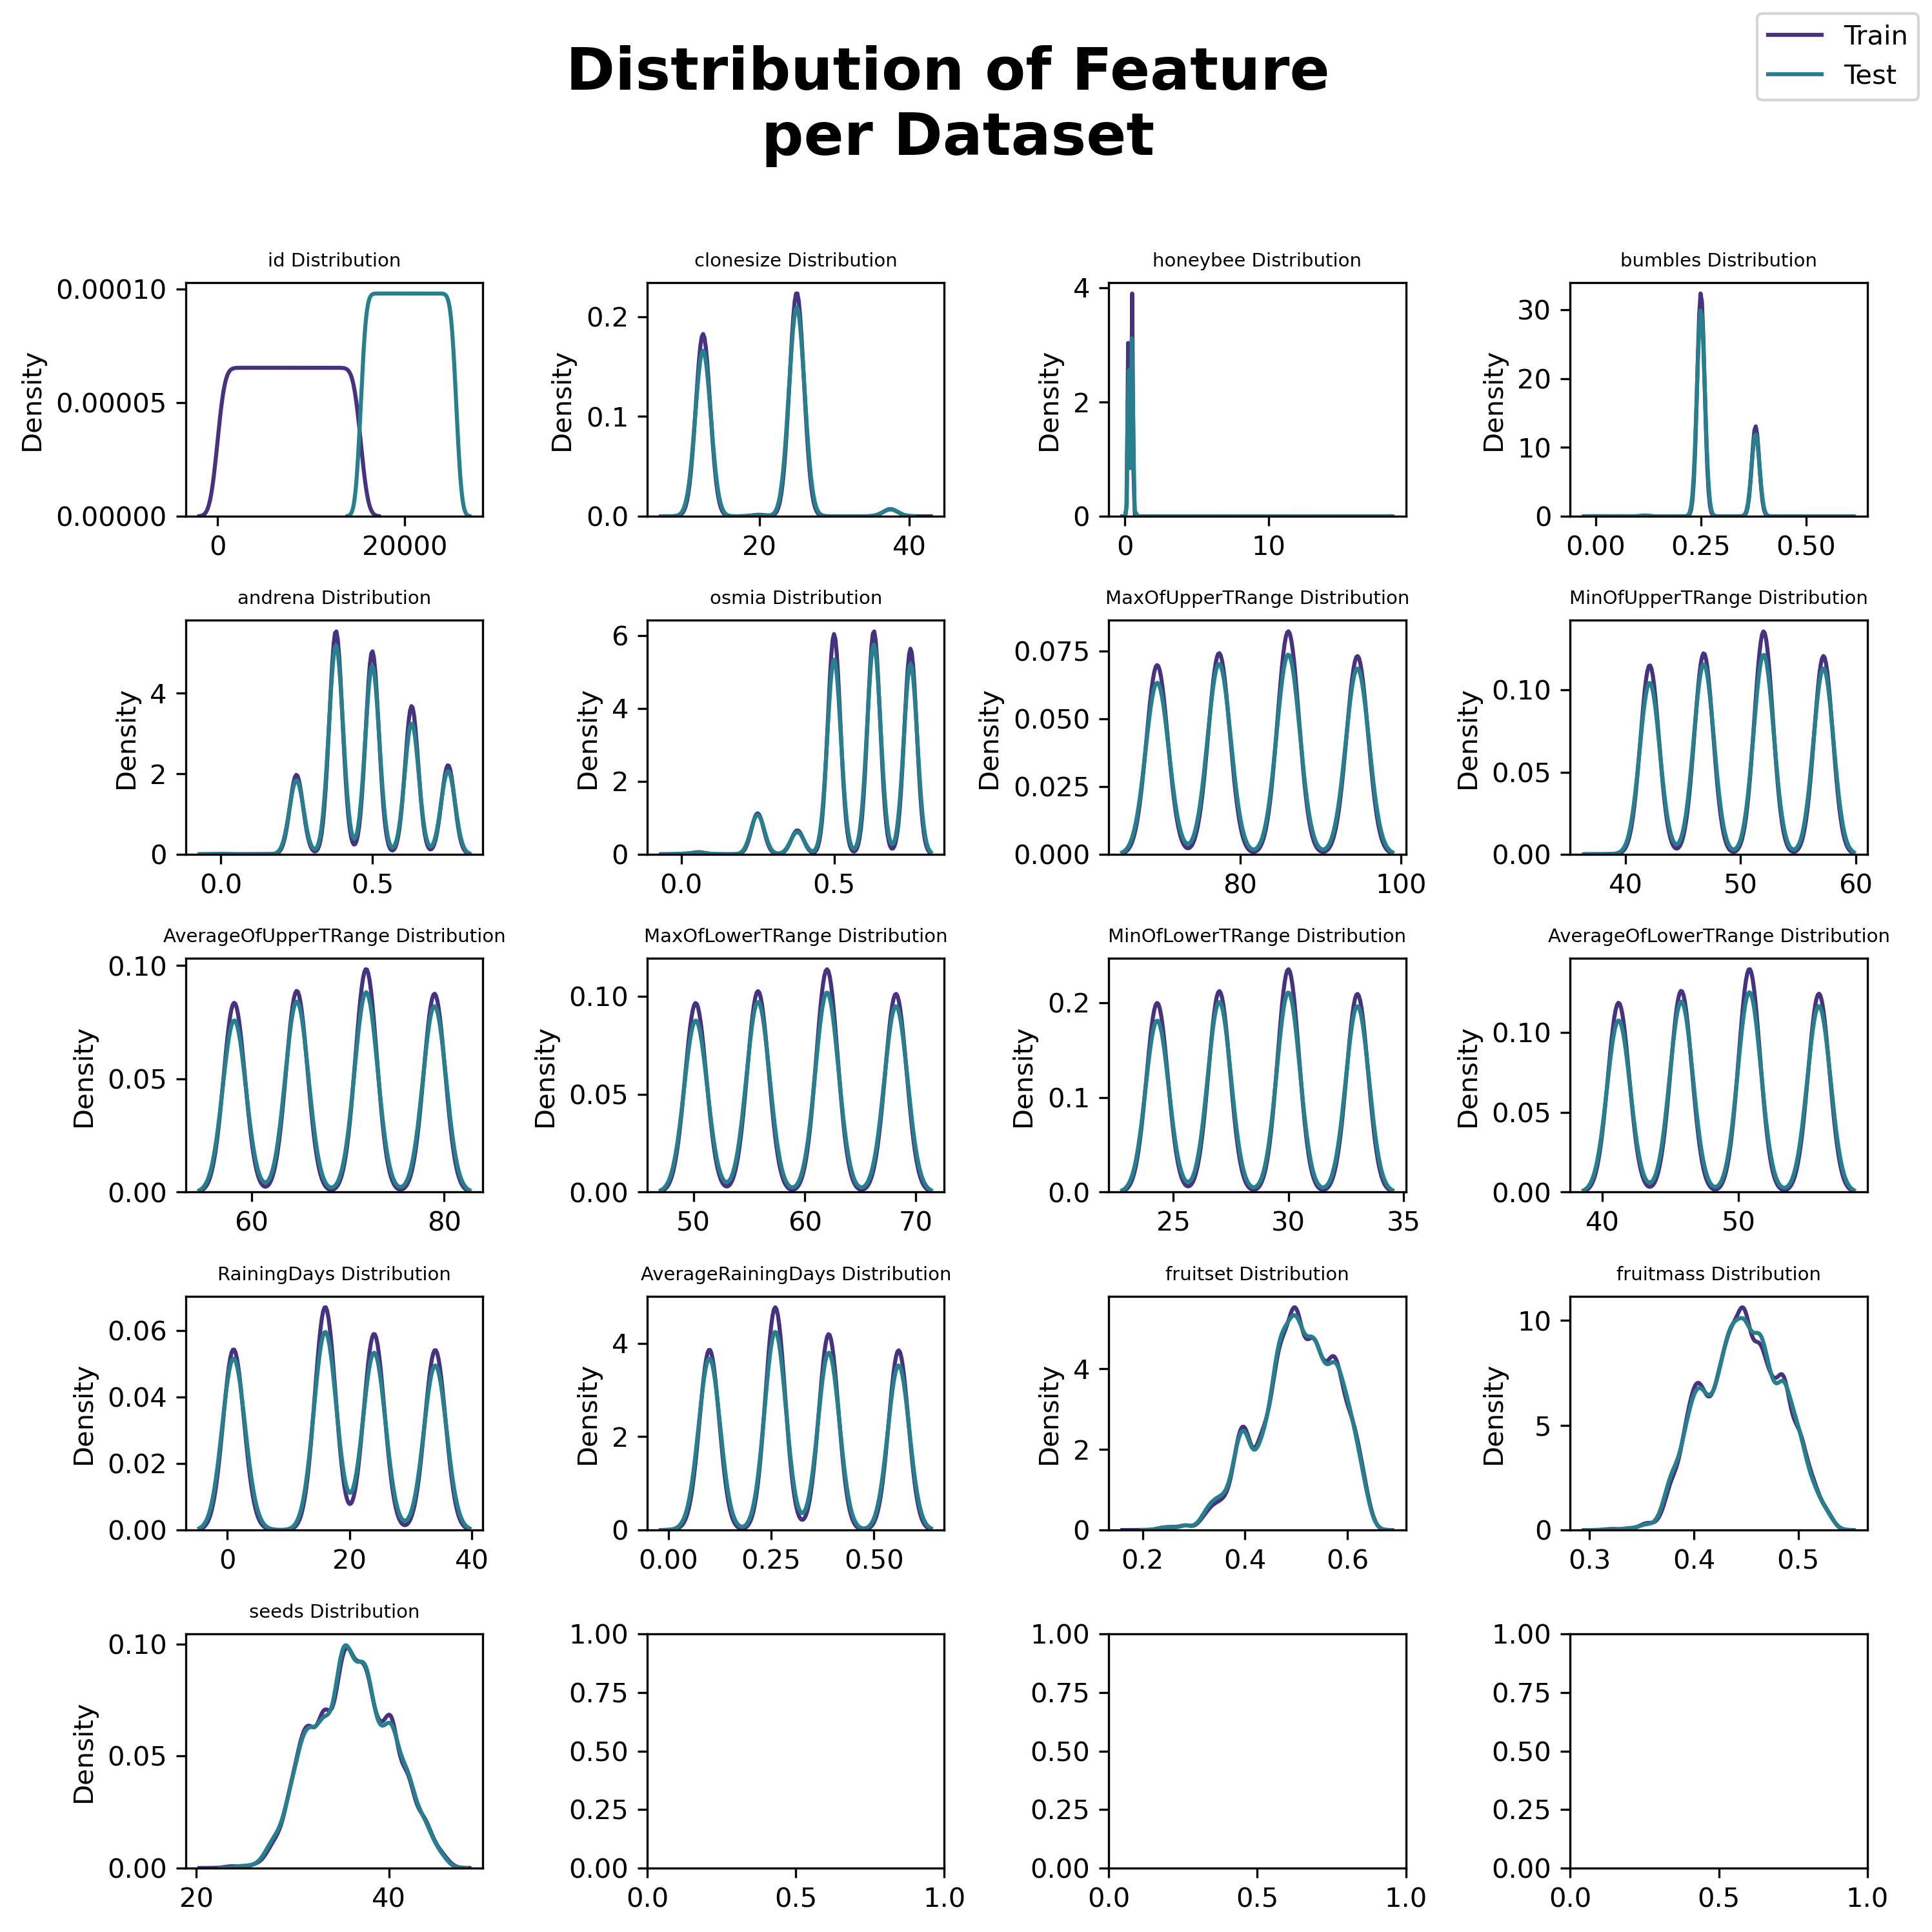

In [15]:
#Distribution

fig, ax = plt.subplots(5, 4, figsize=(10,10), dpi = 300)
ax = ax.flatten() 

for i, column in enumerate(test.columns): #인덱스와 값을 동시에 접근 
    sns.kdeplot(train[column], ax = ax[i], color=sns.color_palette('viridis')[0])
    sns.kdeplot(test[column], ax = ax[i], color=sns.color_palette('viridis')[2])
    
    ax[i].set_title(f'{column} Distribution', size=7)
    ax[i].set_xlabel(None)
    
fig.suptitle('Distribution of Feature \n per Dataset \n', fontsize=22, fontweight='bold')
fig.legend(['Train', 'Test'])
plt.tight_layout()

In [16]:
#train, test data에서 거의 모든 칼럼에서 유사한 형태의 데이터 추이를 갖는다

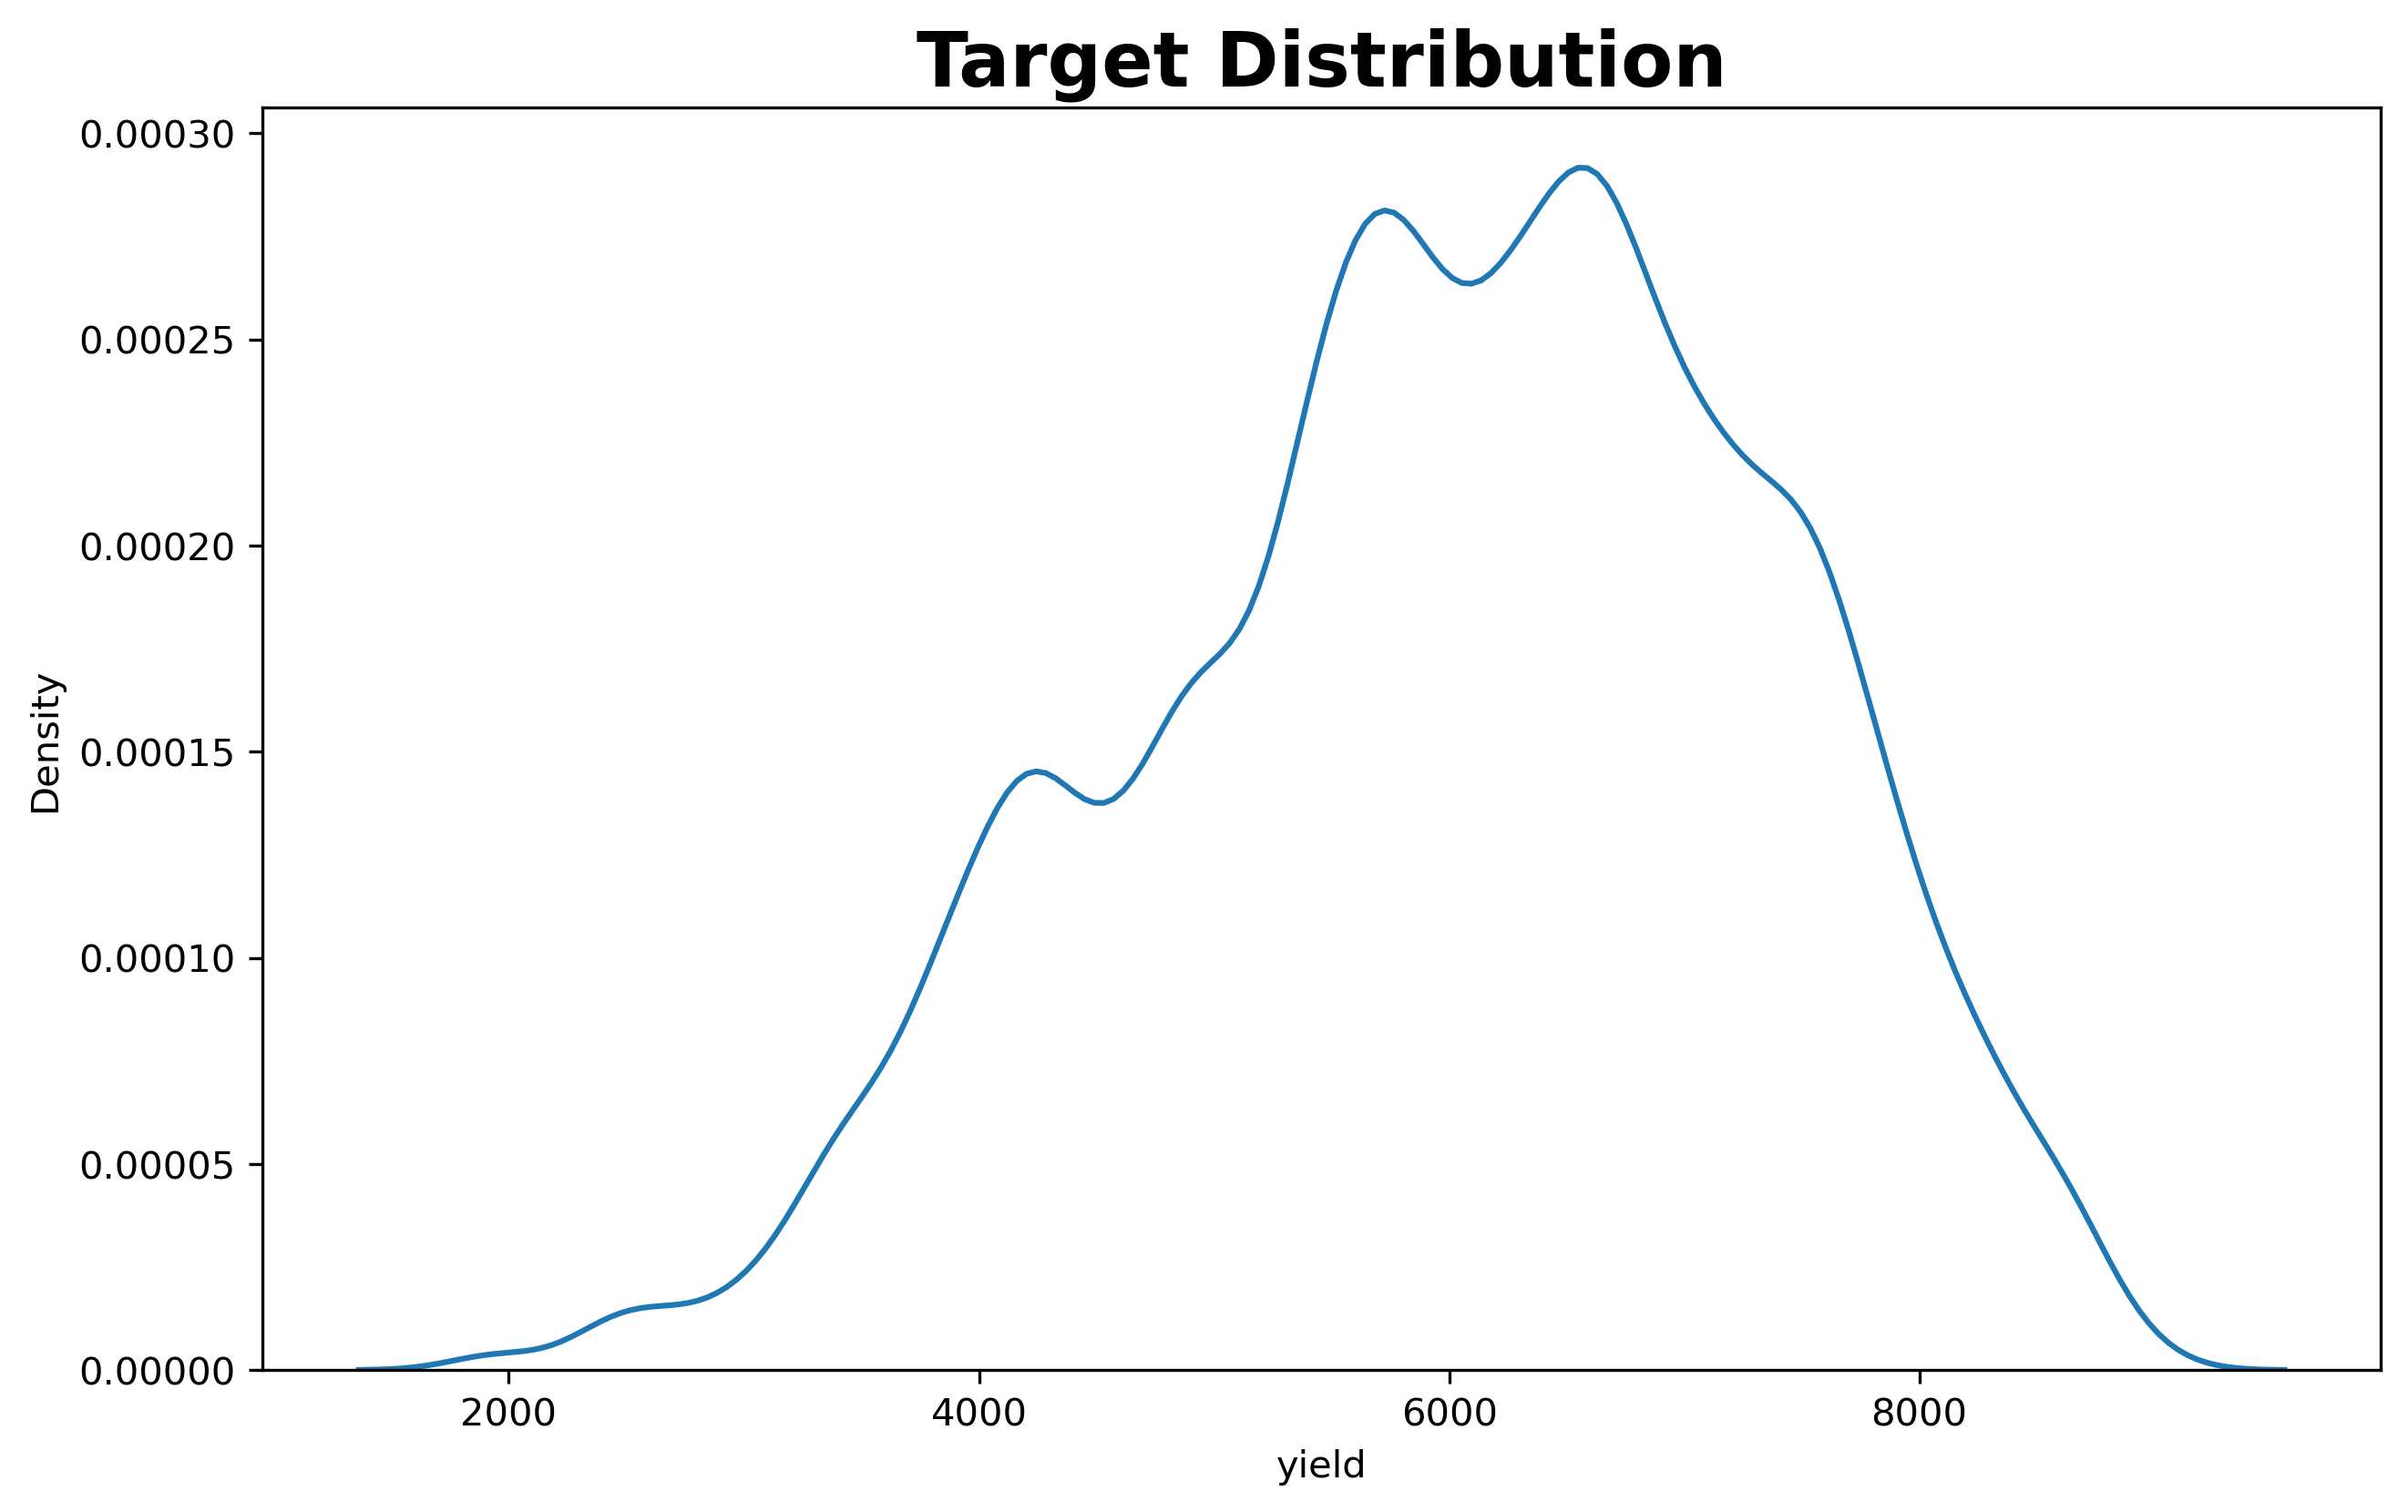

In [17]:
plt.figure(figsize=(10,6), dpi=300)
sns.kdeplot(data=train, x='yield')
plt.title('Target Distribution', weight='bold', size='20')
plt.show()

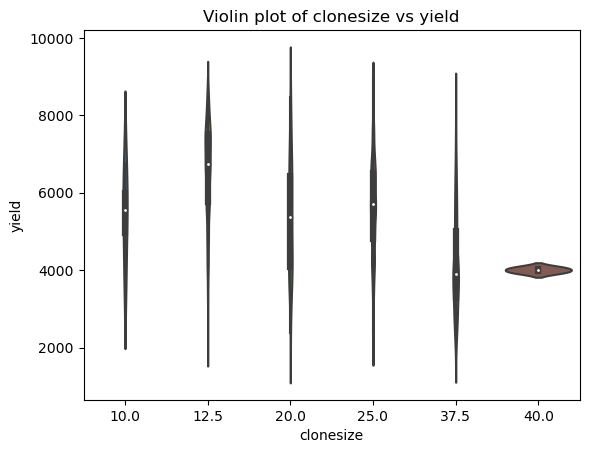

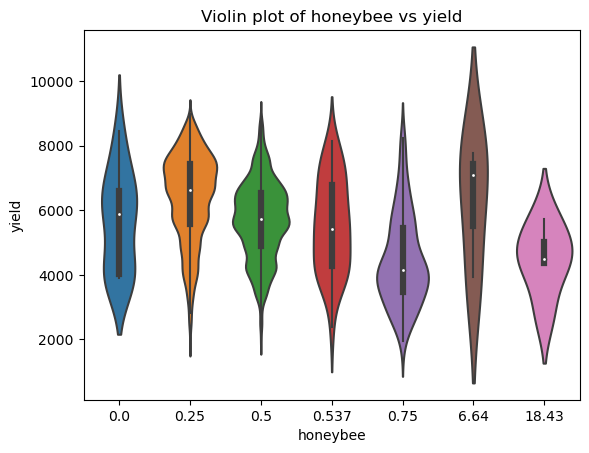

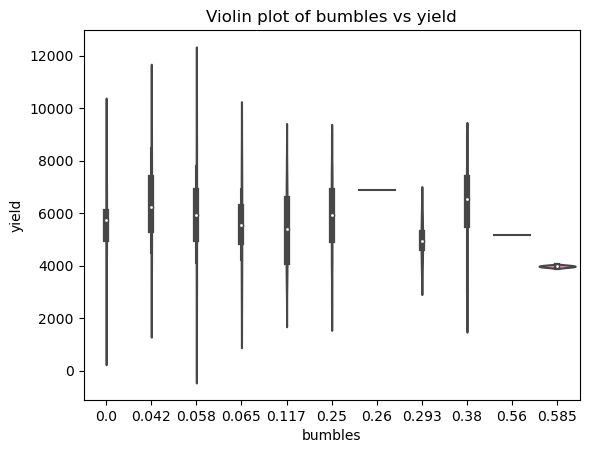

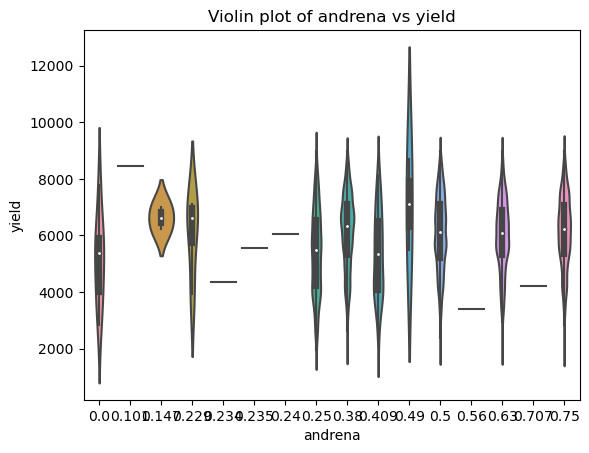

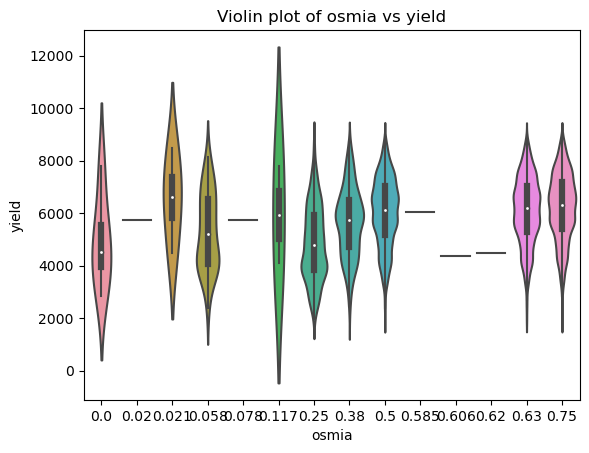

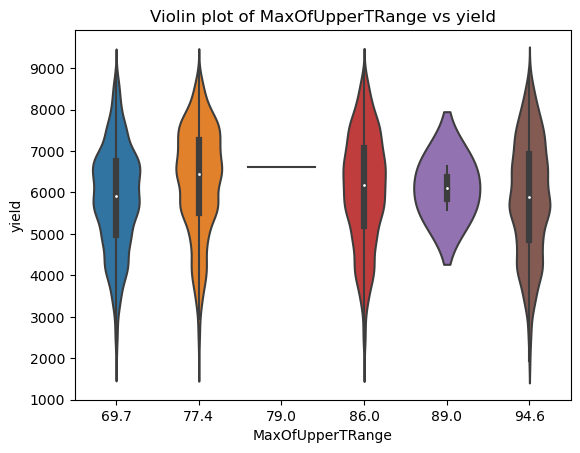

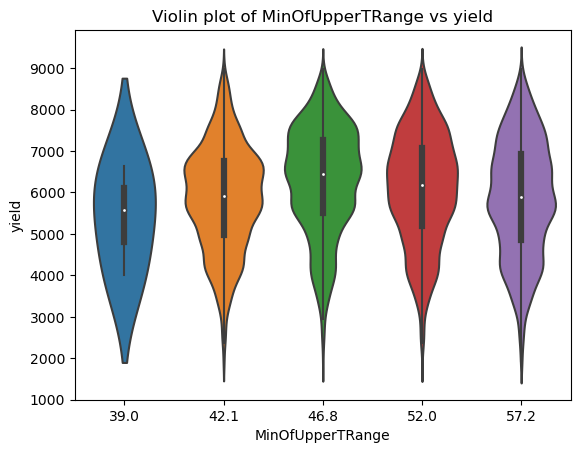

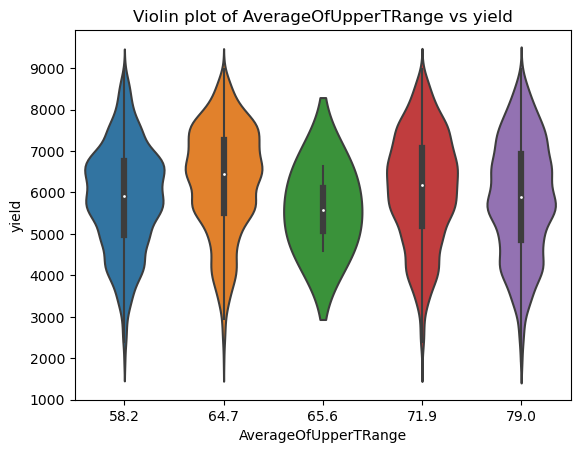

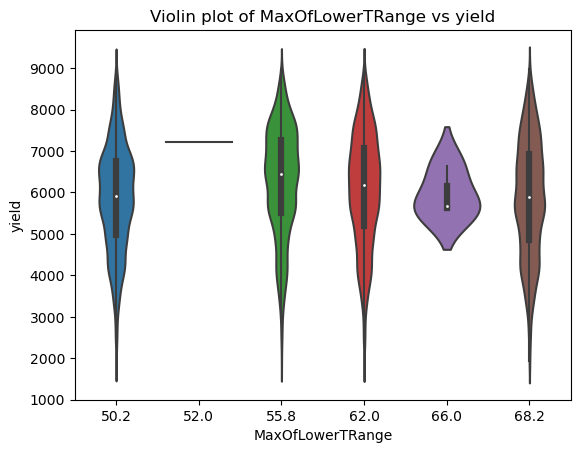

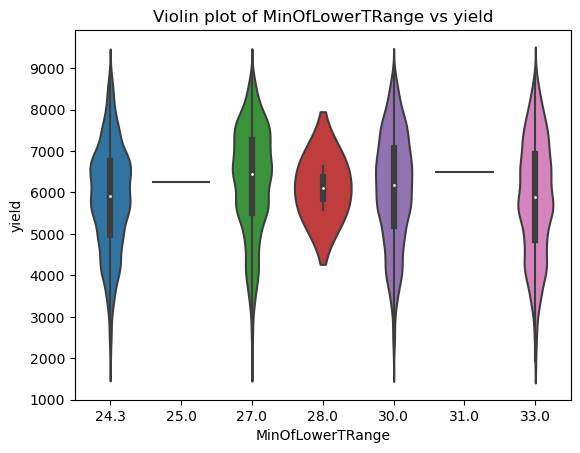

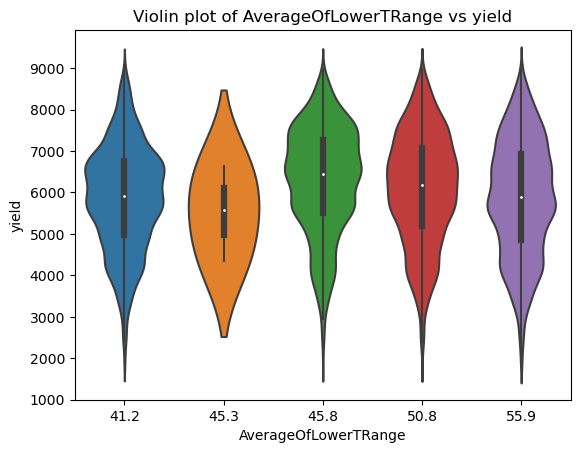

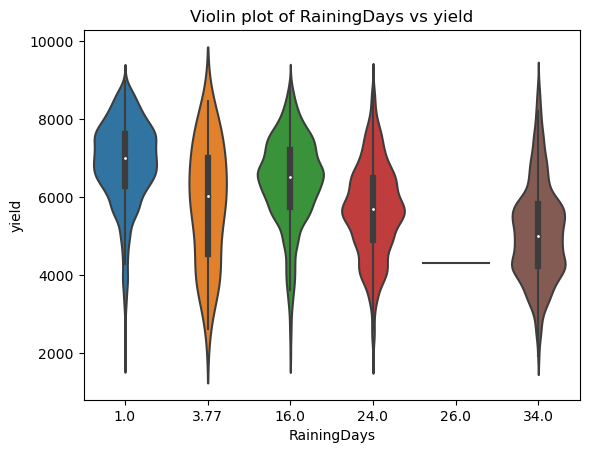

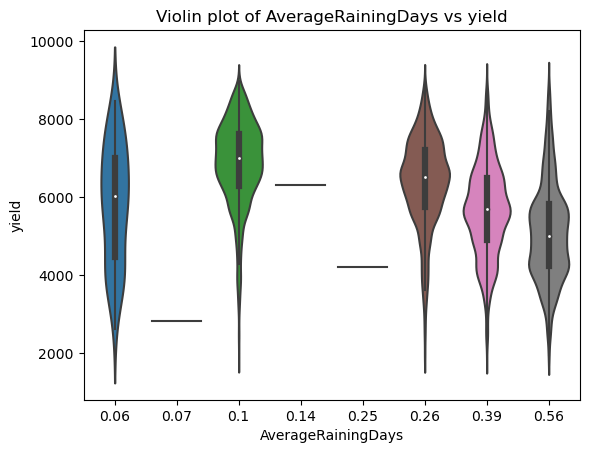

Text(0.5, 0.98, 'Violin Plot of features vs yield')

In [23]:
# Violin Plot으로 생산량별 각 컬럼의 분포도 확인
# Violin Plot 데이터의 분포와 범위를 한눈에 보기 쉽게 나타내는 그래프 형식입니다. 
# 박스 플롯 (Box plot)과 비슷하지만 더 실제에 가까운 분포를 알 수 있다는 장점이 있습니다.

features = train.columns
important_data = train[features]

for feature in features:
    if feature != 'id' and feature != 'yield' and feature != 'fruitset' and feature != 'seeds' and feature != "fruitmass":
        plt.figure()
        sns.violinplot(x=feature, y='yield', data=important_data)
        
        plt.title(f'Violin plot of {feature} vs yield')
        plt.show()

In [22]:
# 그래프 해석
# . -> median값
# 검정박스 -> 1사분위 / 3사분위
# 선 -> 이상치

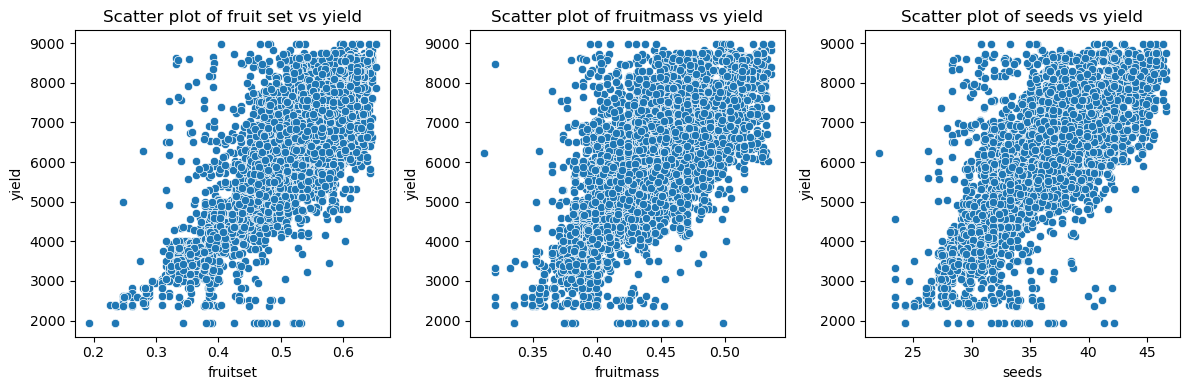

In [25]:
#Scatter plots
# fruit set, fruit mass, seeds와 관련해서는 scatter plots을 생성

plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
sns.scatterplot(x='fruitset', y='yield', data=important_data)
plt.title("Scatter plot of fruit set vs yield")

plt.subplot(1,3,2)
sns.scatterplot(x='fruitmass', y='yield', data=important_data)
plt.title("Scatter plot of fruitmass vs yield")

plt.subplot(1,3,3)
sns.scatterplot(x='seeds', y='yield', data=important_data)
plt.title("Scatter plot of seeds vs yield")

plt.tight_layout()
plt.show()

## Correlation

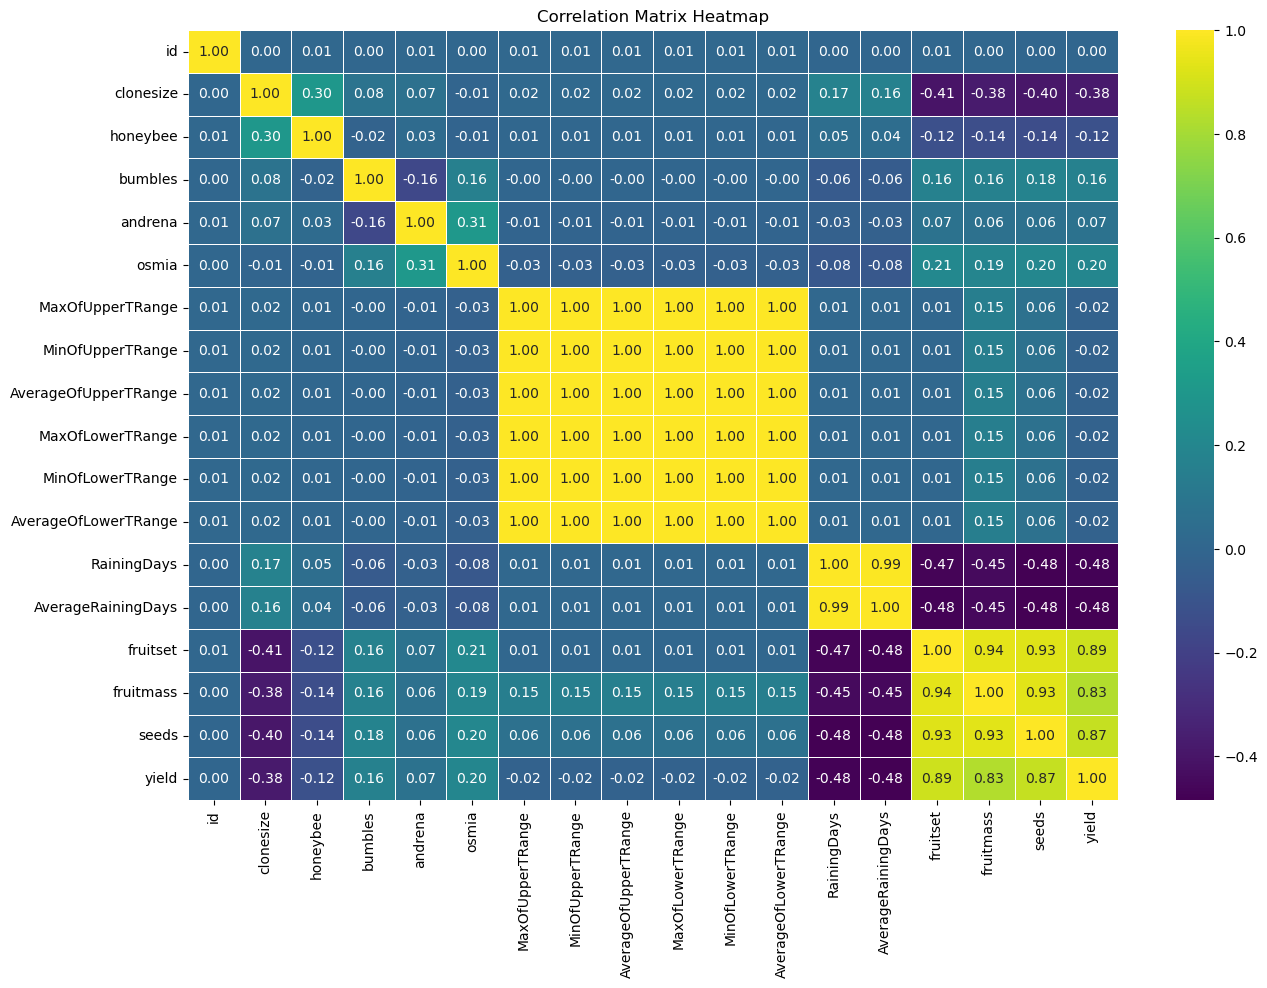

In [26]:
#yield에 영향을 끼치는 요소가 어떤게 있는지 확인하기 위한 상관관계 분석

correlation_matrix = train.corr()

plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

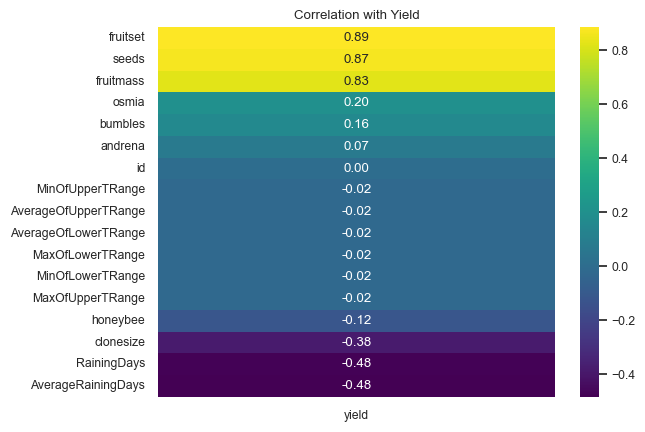

In [27]:
#yield 컬럼을 기준으로만 상관관계를 확인

corr = train.corr()
target_corr = corr['yield'].drop('yield')

target_corr_sorted = target_corr.sort_values(ascending=False) #내림차순

sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("viridis")
sns.heatmap(target_corr_sorted.to_frame(), cmap="viridis", annot=True, fmt='.2f')
plt.title('Correlation with Yield')
plt.show()

## Modeling Preparation

In [33]:
from category_encoders import OneHotEncoder, MEstimateEncoder, GLMMEncoder, OrdinalEncoder
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold, KFold
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor, VotingRegressor, StackingRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.linear_model import PassiveAggressiveRegressor, ARDRegression
from sklearn.linear_model import TheilSenRegressor, HuberRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, roc_auc_score, roc_curve
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import FunctionTransformer, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform
from xgboost import XGBRegressor, XGBClassifier
# from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [29]:
X = train.copy()
y = X.pop('yield')

seed = 42
splits = 5
k = KFold(n_splits = splits, random_state=seed, shuffle = True)

np.random.seed(seed)

## Base Models

In [30]:
#교차검증을 통해 모델 성능 평가 -> MAE 사용
#데이터를 여러 개의 겹치지 않는 부분집합으로 나누어 모델을 여러 번 학습 및 검증

def cross_val_score(model, cv=k, label=''):
    
    X = train.copy()
    y = X.pop('yield')
    
    val_predictions = np.zeros(len(train)) #0으로 초기화된 배열 생성
    train_predictions = np.zeros(len(train))
    train_mae, val_mae = [],[]
    
    for fold, (train_idx, val_idx) in enumerate(cv.split(X,y)): 
    #cv객체를 train과 validation으로 나눈다
        model.fit(X.iloc[train_idx], y.iloc[train_idx]) #반복해서 학습 데이터를 사용하여 모델 학습
        
        train_preds = model.predict(X.iloc[train_idx]) #학습데이터로 모델이 만든 예측값은 train_preds에,
        val_preds = model.predict(X.iloc[val_idx]) #검증데이터로 모델이 만든 예측값은 val_preds에 저장
        
        train_predictions[train_idx] += train_preds
        val_predictions[val_idx] += val_preds
        
        #Mean Absolute Error 계산
        train_score = mean_absolute_error(y.iloc[train_idx], train_preds)
        val_score = mean_absolute_error(y.iloc[val_idx], val_preds)
        
        train_mae.append(train_score)
        val_mae.append(val_score)
        
        #MAE출력
        print(f'Val MAE: {np.mean(val_mae):.5f} + {np.std(val_mae):.5f}| Train MAE: {np.mean(train_mae):.5f} + {np.std(train_mae):.5f} | {label} ')
        
        return val_mae

In [36]:
mae_list = pd.DataFrame()

models = [
    ('linear', LinearRegression()),
    ('ridge', Ridge(random_state = seed)),
    ('lasso', Lasso(random_state = seed, max_iter = 1000000)),
    ('elastic', ElasticNet(random_state = seed, max_iter = 1000000)),
    ('huber', HuberRegressor(max_iter = 1000000)),
    ('ard', ARDRegression()),
    ('passive', PassiveAggressiveRegressor(random_state = seed)),
    ('theilsen', TheilSenRegressor(random_state = seed)),
    ('linearsvm', LinearSVR(random_state = seed, max_iter = 1000000)),
    ('mlp', MLPRegressor(random_state = seed, max_iter = 1000000)),
    ('et', ExtraTreesRegressor(random_state = seed)),
    ('rf', RandomForestRegressor(random_state = seed)),
    ('xgb', XGBRegressor(random_state = seed, eval_metric = 'mae')),
#     ('lgb', LGBMRegressor(random_state = seed, objective = 'mae')),
#     ('dart', LGBMRegressor(random_state = seed, boosting_type = 'dart')),
    ('cb', CatBoostRegressor(random_state = seed, objective = 'MAE', verbose = 0)),
    ('gb', GradientBoostingRegressor(random_state = seed, loss = 'absolute_error')),
    ('hgb', HistGradientBoostingRegressor(random_state = seed, loss = 'absolute_error')),
    ('knn', KNeighborsRegressor())
]

for (label, model) in models:
     mae_list[label] = cross_val_score(model, label = label)

Val MAE: 370.42797 + 0.00000| Train MAE: 371.36749 + 0.00000 | linear 
Val MAE: 373.25525 + 0.00000| Train MAE: 374.31838 + 0.00000 | ridge 
Val MAE: 378.96288 + 0.00000| Train MAE: 379.77955 + 0.00000 | lasso 
Val MAE: 433.12465 + 0.00000| Train MAE: 434.05034 + 0.00000 | elastic 
Val MAE: 409.54518 + 0.00000| Train MAE: 414.03216 + 0.00000 | huber 
Val MAE: 370.57876 + 0.00000| Train MAE: 371.77147 + 0.00000 | ard 
Val MAE: 524.95345 + 0.00000| Train MAE: 523.35306 + 0.00000 | passive 
Val MAE: 372.68008 + 0.00000| Train MAE: 371.97524 + 0.00000 | theilsen 


/Users/yoon/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Val MAE: 462.33596 + 0.00000| Train MAE: 458.73078 + 0.00000 | linearsvm 
Val MAE: 487.87776 + 0.00000| Train MAE: 482.98681 + 0.00000 | mlp 
Val MAE: 373.87564 + 0.00000| Train MAE: 0.00000 + 0.00000 | et 
Val MAE: 361.72381 + 0.00000| Train MAE: 136.61729 + 0.00000 | rf 
Val MAE: 367.55300 + 0.00000| Train MAE: 252.05393 + 0.00000 | xgb 
Val MAE: 340.50626 + 0.00000| Train MAE: 315.54998 + 0.00000 | cb 
Val MAE: 344.18955 + 0.00000| Train MAE: 343.93704 + 0.00000 | gb 
Val MAE: 341.21788 + 0.00000| Train MAE: 322.26388 + 0.00000 | hgb 
Val MAE: 913.29805 + 0.00000| Train MAE: 730.71177 + 0.00000 | knn 


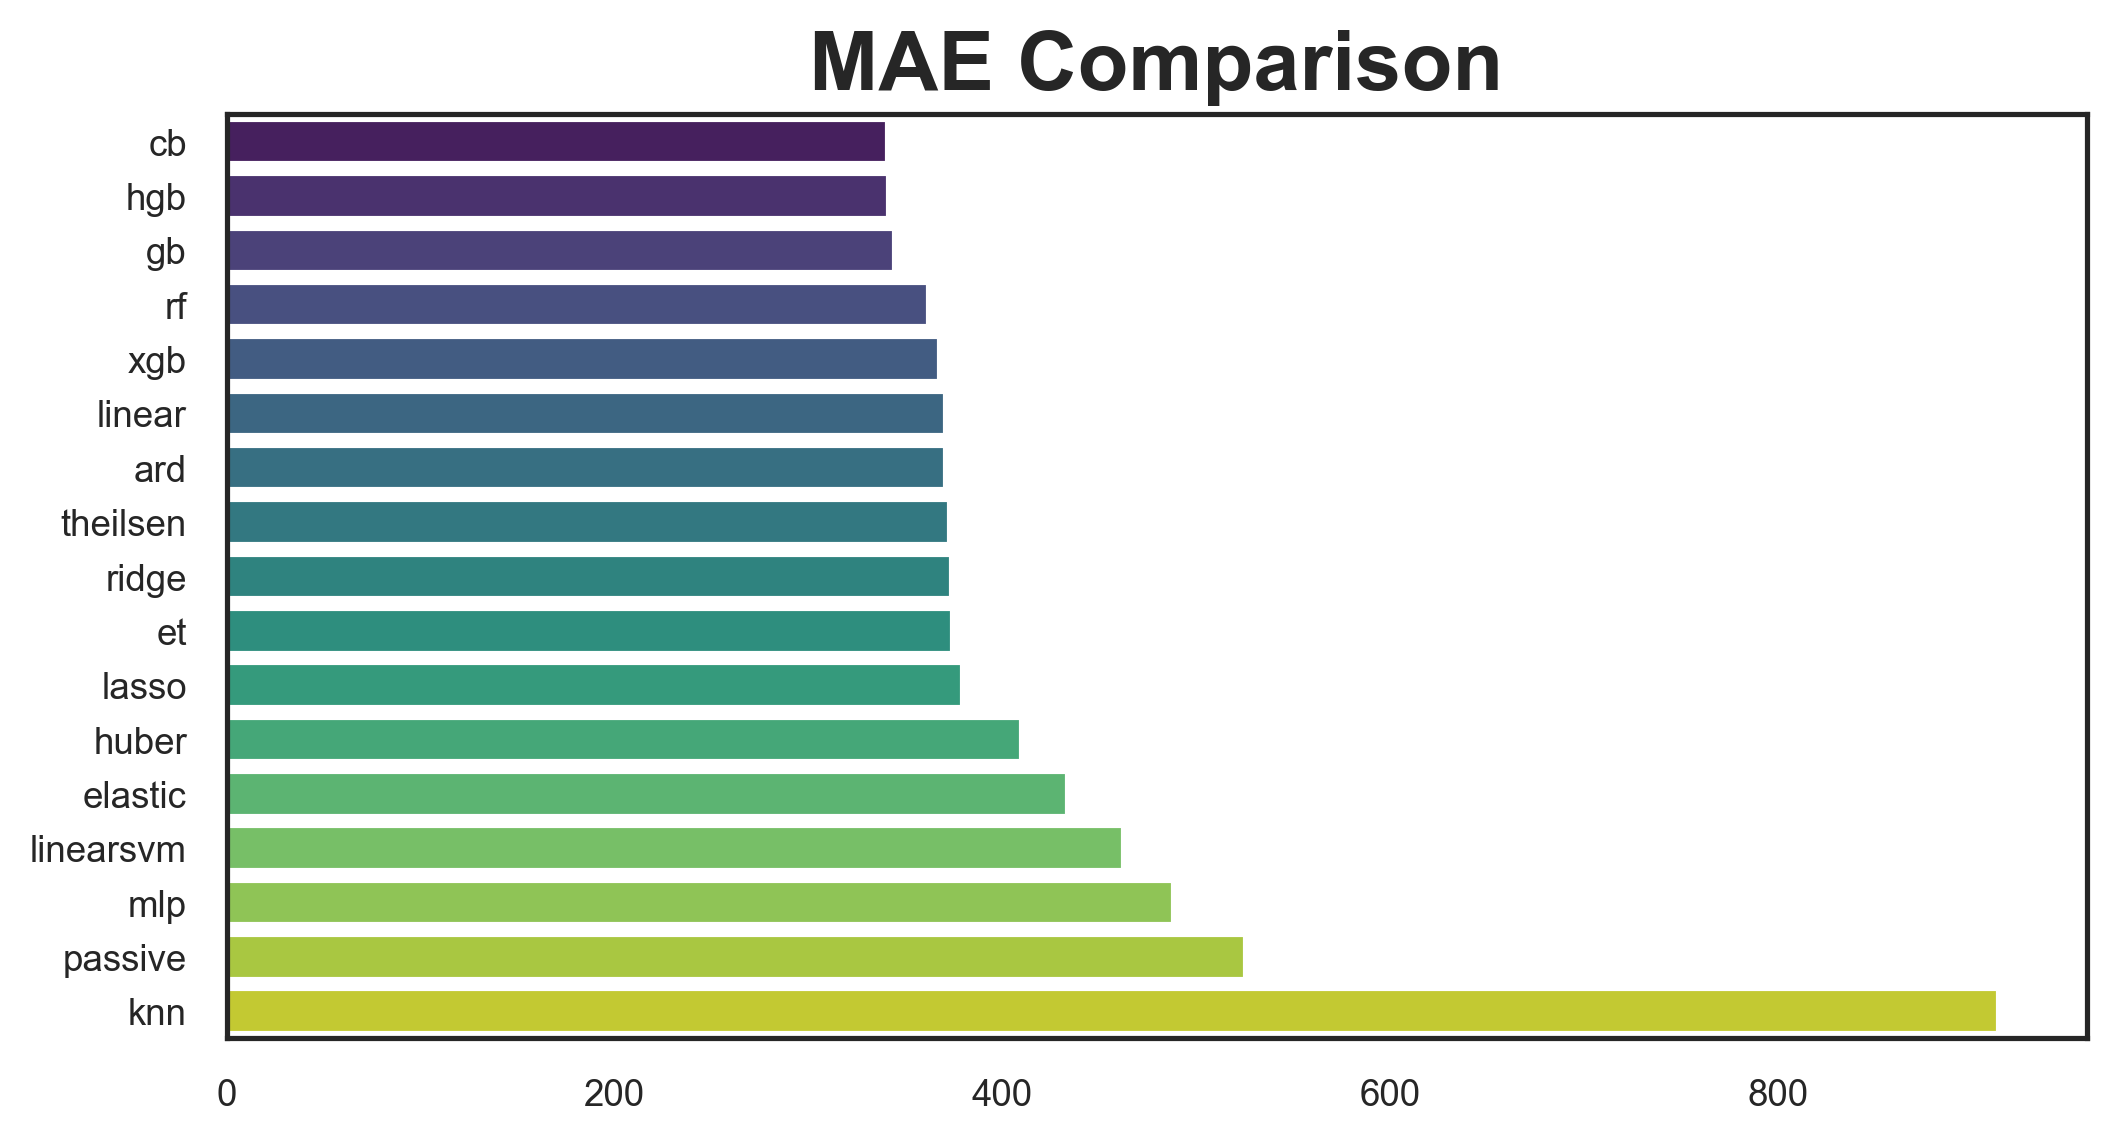

In [37]:
plt.figure(figsize = (8, 4), dpi = 300)
sns.barplot(data = mae_list.reindex((mae_list).mean().sort_values().index, axis = 1), palette = 'viridis', orient = 'h')
plt.title('MAE Comparison', weight = 'bold', size = 20)
plt.show()

In [67]:
#catboost의 mae값이 가장 낮으므로 예측이 가장 정확하다고 볼 수 있다

In [40]:
def postprocessor(prediction):
    unique_targets = np.unique(train['yield'])
    return [min(unique_targets, key = lambda x: abs(x - pred)) for pred in prediction]
    #실제값-예측값의 절대값이 가장 낮은걸 선택해서 반환하는 과정

In [41]:
def cross_val_score_2(model, cv = k, label = ''):
    
    X = train.copy()
    y = X.pop('yield')
    
    #initiate prediction arrays and score lists
    val_predictions = np.zeros((len(train)))
    train_predictions = np.zeros((len(train)))
    train_mae, val_mae = [], []
    
    #training model, predicting prognosis probability, and evaluating log loss
    for fold, (train_idx, val_idx) in enumerate(cv.split(X, y)):
        
        model.fit(X.iloc[train_idx], y.iloc[train_idx])

        train_preds = postprocessor(model.predict(X.iloc[train_idx]))
        val_preds = postprocessor(model.predict(X.iloc[val_idx]))
                  
        train_predictions[train_idx] += train_preds
        val_predictions[val_idx] += val_preds
        
        train_score = mean_absolute_error(y.iloc[train_idx], train_preds)
        val_score = mean_absolute_error(y.iloc[val_idx], val_preds)
        
        train_mae.append(train_score)
        val_mae.append(val_score)
    
    print(f'Val MAE: {np.mean(val_mae):.5f} ± {np.std(val_mae):.5f} | Train MAE: {np.mean(train_mae):.5f} ± {np.std(train_mae):.5f} | {label}')
    
    return val_mae

In [61]:
cb = Pipeline([('scale', StandardScaler()), ('cb', CatBoostRegressor(random_state = seed, objective = 'MAE', verbose = 0))])
_ = cross_val_score(cb, label='Catboosting')

Val MAE: 340.75746 + 0.00000| Train MAE: 315.30236 + 0.00000 | Catboosting 


In [62]:
#여러개의 모델들로 앙상블을 하면 MAE가 더 낮아질까?

ensemble_models = [
    ('cb', CatBoostRegressor(random_state = seed, objective = 'MAE', verbose = 0)),
    ('gb', GradientBoostingRegressor(random_state = seed, loss = 'absolute_error')),
    ('hgb', HistGradientBoostingRegressor(random_state = seed, loss = 'absolute_error')),    
]

voter = Pipeline([('scale', StandardScaler()), ('vote',VotingRegressor(ensemble_models))])

_ = cross_val_score(voter, label = 'Voting Ensemble')

Val MAE: 339.23891 + 0.00000| Train MAE: 325.20886 + 0.00000 | Voting Ensemble 


In [63]:
#모델 학습
cb.fit(X, y) 
prediction = postprocessor(cb.predict(test))

In [64]:
test1 = pd.read_csv('test.csv')

In [65]:
test1.drop(list(test1.drop('id', axis = 1)), axis = 1, inplace = True)

In [66]:
test1['yield'] = prediction
test1

,id,yield
0,15289,4218.32799
1,15290,5830.48855
2,15291,7428.83442
3,15292,4768.59437
4,15293,3723.52338
...,...,...
10189,25478,5377.27086
10190,25479,5643.36045
10191,25480,6621.25081
10192,25481,4320.87416


## Random Forest 활용해보기

### Data Split

In [17]:
from sklearn.model_selection import train_test_split

X = train.copy()
y = X.pop('yield')

#train_data, test_data, train_target, test_target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.7, random_state=42
)

### Random Forest

In [18]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor()

#### 1-1) 학습

In [24]:
rf_regressor.fit(X_train, y_train)

RandomForestRegressor()

#### 1-2) 예측

In [25]:
train_pred = rf_regressor.predict(X_train)
test_pred = rf_regressor.predict(X_test)

Text(0, 0.5, 'real')

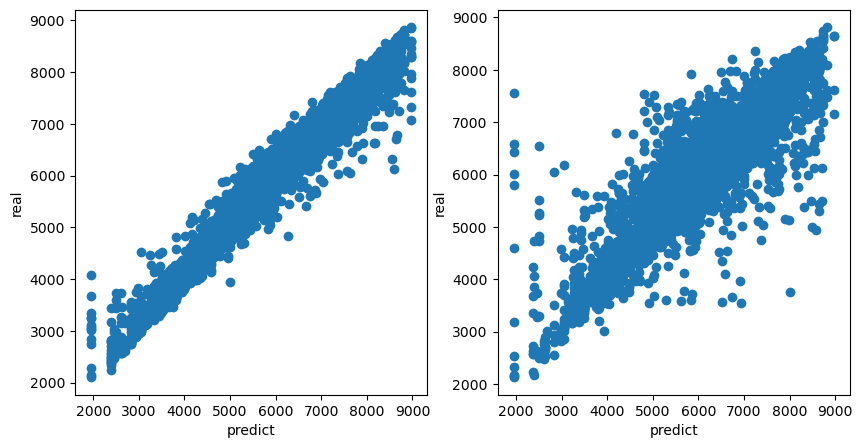

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

axes[0].scatter(y_train, train_pred)
axes[0].set_xlabel("predict")
axes[0].set_ylabel("real")

axes[1].scatter(y_test, test_pred)
axes[1].set_xlabel("predict")
axes[1].set_ylabel("real")

#### 1-3) 평가


In [27]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)

In [28]:
print(f"train mean squared error is {train_mse:.4f}")
print(f"test mean squared error is {test_mse:.4f}")

train mean squared error is 46641.1350
test mean squared error is 347760.0474


### Feature Importance

In [40]:
features = train.columns

In [77]:
rf_regressor.feature_importances_

array([0.03106846, 0.00307567, 0.00330112, 0.00418451, 0.00847298,
       0.00784274, 0.00224706, 0.00214868, 0.00222312, 0.00225169,
       0.00219007, 0.00222033, 0.00613807, 0.00543242, 0.75349243,
       0.03144857, 0.13226208])

<AxesSubplot:>

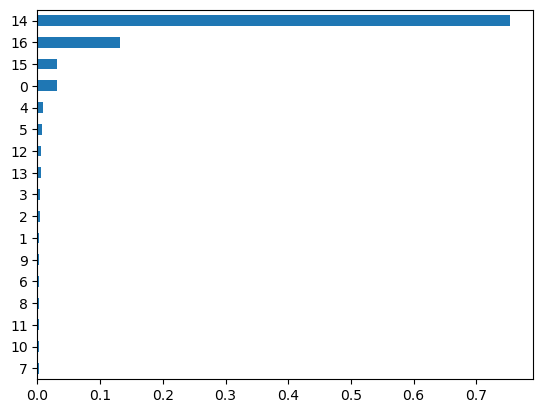

In [75]:
feature_importance = pd.Series(rf_regressor.feature_importances_)
feature_importance.sort_values(ascending=True).plot(kind="barh")

### Best Parameter

In [52]:
from sklearn.model_selection import GridSearchCV

#### 1) 탐색 범위 설정

In [57]:
params = {
    "n_estimators" : [100, 200, 300, 500, 700, 900, 1000],
    "criterion" : ["mae", "mse"],
    "max_depth" : [3, 5, 7, 10]
}

In [58]:
params

{'n_estimators': [100, 200, 300, 500, 700, 900, 1000],
 'criterion': ['mae', 'mse'],
 'max_depth': [3, 5, 7, 10]}

In [59]:
cv_rf_regressor = RandomForestRegressor()

#### 2) 탐색

In [60]:
grid = GridSearchCV(estimator=cv_rf_regressor, param_grid=params, cv=3, n_jobs=-1)
grid = grid.fit(X_train, y_train)

/Users/yoon/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/yoon/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/yoon/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/yoon/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/yoon/opt/anaconda3/lib/python3.9/site

/Users/yoon/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/yoon/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/yoon/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/yoon/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/yoon/opt/anaconda3/lib/python3.9/site

/Users/yoon/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/yoon/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/yoon/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/yoon/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
/Users/yoon/opt/anaconda3/lib/python3.9/site

/Users/yoon/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/yoon/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/yoon/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/yoon/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/yoon/opt/anaconda3/lib/python3.9/site-pac

/Users/yoon/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/yoon/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/yoon/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/yoon/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/yoon/opt/anaconda3/lib/python3.9/site-pac

In [61]:
print(f"Best score of parameter search is: {grid.best_score_:.4f}")
# GridSearchCV - mae, mse, r2 score 어떤 것을 목표로할지 설정할 수 있음 (지정해줘야한다)

Best score of parameter search is: 0.8186


#### 3) 평가

In [62]:
best_rf = grid.best_estimator_

In [63]:
cv_train_pred = best_rf.predict(X_train)
cv_test_pred = best_rf.predict(X_test)

Text(0, 0.5, 'real')

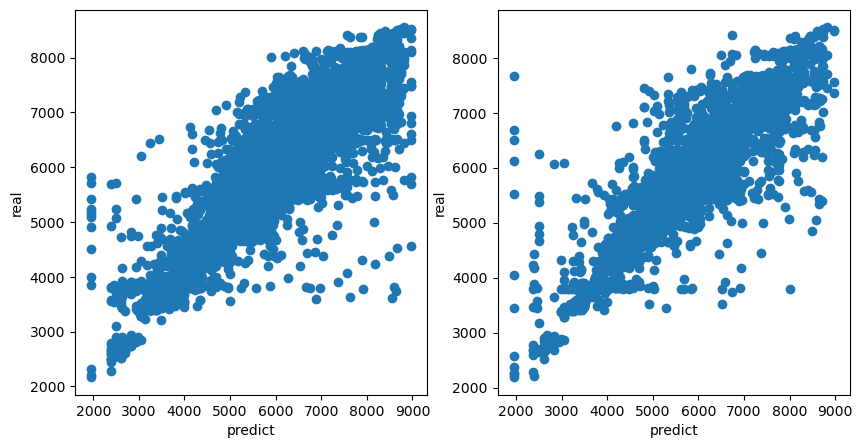

In [64]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

axes[0].scatter(y_train, cv_train_pred)
axes[0].set_xlabel("predict")
axes[0].set_ylabel("real")

axes[1].scatter(y_test, cv_test_pred)
axes[1].set_xlabel("predict")
axes[1].set_ylabel("real")

In [65]:
cv_train_mse = mean_squared_error(y_train, cv_train_pred)
cv_test_mse = mean_squared_error(y_test, cv_test_pred)

In [66]:
print(f"Best model train mean squared error is {cv_train_mse:.4f}")
print(f"Best model test mean squared error is {cv_test_mse:.4f}")

Best model train mean squared error is 267290.7115
Best model test mean squared error is 331081.2160


<AxesSubplot:>

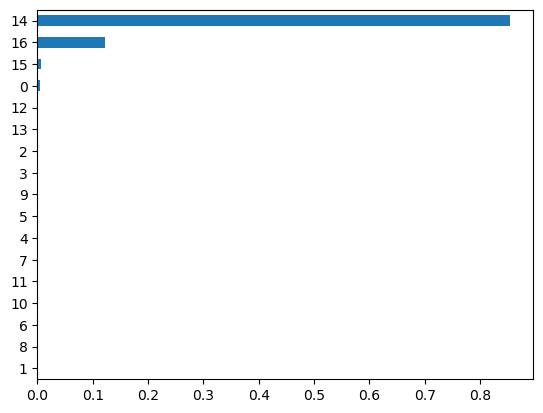

In [74]:
cv_feature_importance = pd.Series(best_rf.feature_importances_)
cv_feature_importance.sort_values(ascending=True).plot(kind="barh")

In [71]:
print(f"Test mean squared error is {test_mse:.4f}")
print(f"Best model test mean squared error is {cv_test_mse:.4f}")

Test mean squared error is 347760.0474
Best model test mean squared error is 331081.2160


<AxesSubplot:>

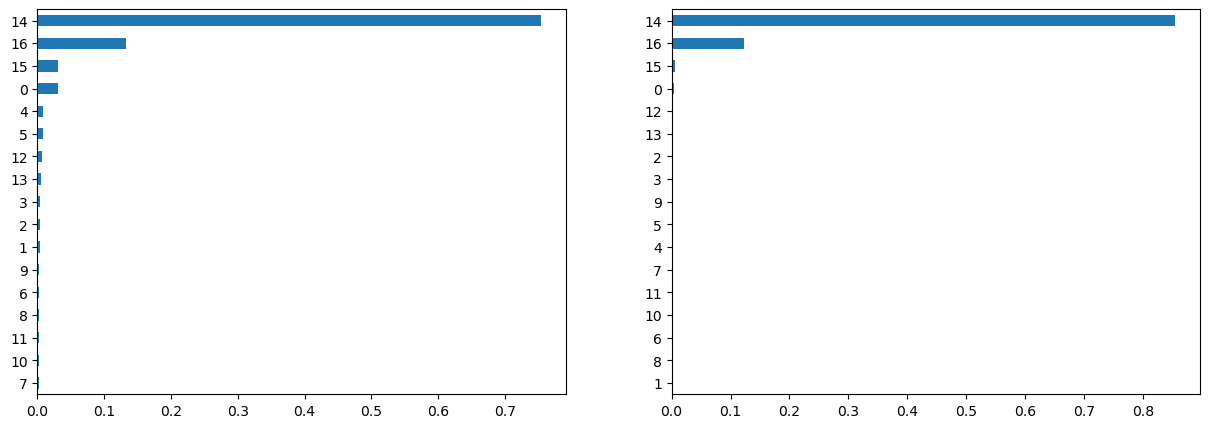

In [76]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
feature_importance.sort_values(ascending=True).plot(kind="barh", ax=axes[0])
cv_feature_importance.sort_values(ascending=True).plot(kind="barh", ax=axes[1])